In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
train_df.drop(columns=['keyword', 'id', 'location'], inplace=True)
train_df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


## Finding keywords

In [4]:
train_df_targ = train_df.loc[train_df['target'] == 1]
len(train_df_targ)

3271

In [5]:
all_words = ' '.join(train_df_targ['text'].values)

In [6]:
words = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+') 
tokenized_words = tokenizer.tokenize(all_words)

for review in tokenized_words:
    words.append(review.lower())


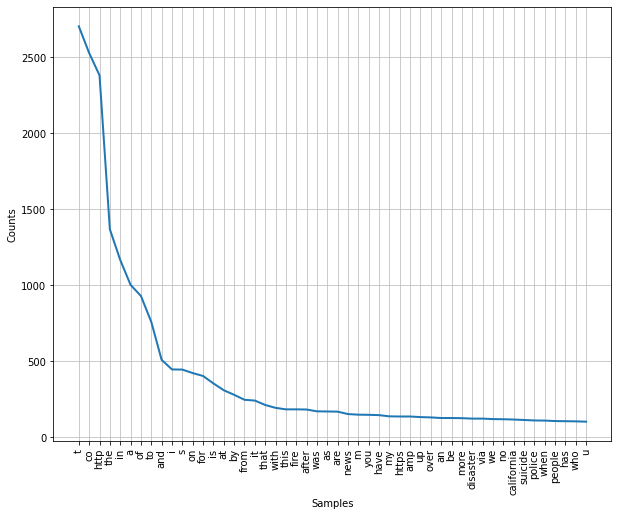

In [7]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
FreqDist(words).plot(50)
plt.show()

### Removing irrelevant words

In [8]:
# I've gone in and found all of the major words to take out
remove_words = ['t', 'co', 'http', 'the', 'in', 'a', 'of', 'to', 'and', 'i', 's', 'on', 'for', 'is', 'at',
             'by', 'from', 'it', 'that', 'with', 'this', 'after', 'was', 'as', 'are', 'you', 'have', 'my', 'https', 'up',
            'over', 'an', 'be', 'more', 'we', 'no', 'when', 'who', 'u', 'm', 'has', 'but', 'not', 'been', 'like', 'pm', 'were', 'just', 'than', 'd', 'p', 'w', 'will', 'into'
               'now', 'so', 'r', 'out', 'about', 'about', 'all', 'two', 'mh', 'there', 'what', 'they',
               'into', 'n', 'e', 'c', 'b', 'get', 'l', 'me', 'one', 'how', 'your', 'x', 'can', 'if', 'some', 
              'h', 'q', 're', 'us', 'he', 'still', 'or', 'off', 'may', 'our', 'amp']

for l in list('abcdefghijklmnopqrstuvwxyz'):
    remove_words.append(l)

In [9]:
words = [w for w in words if w not in remove_words]

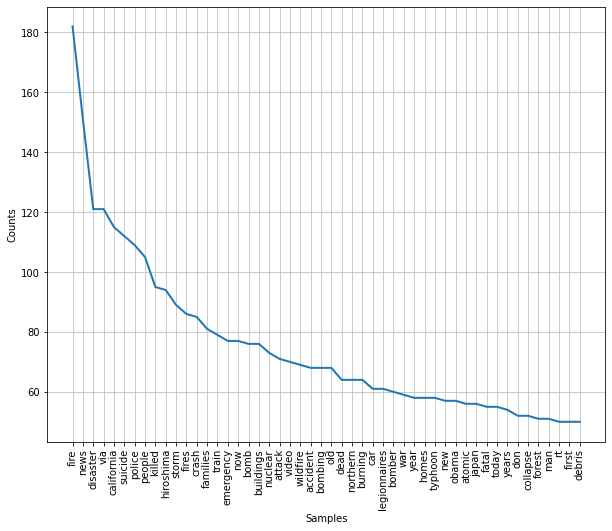

In [10]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
FreqDist(words).plot(50)
plt.show()

In [11]:
def stem(doc):
    
    doc = doc.split(' ')
    stemmed = ''
    for word in doc:
        stemmed += PorterStemmer().stem(word) + ' '
        
    return stemmed



def lem(doc):
    
    doc = doc.split(' ')
    lemmed = ''
    for word in doc:
        lemmed += WordNetLemmatizer().lemmatize(word, pos='v') + ' '
        
    lemmed = lemmed.split(' ')
    new_lemmed = ''
    for word in lemmed:
        new_lemmed += WordNetLemmatizer().lemmatize(word, pos='a') + ' '
        
    return new_lemmed

In [12]:
train_df['stemmed'] = train_df['text'].apply(stem)

In [13]:
print(train_df['text'].iloc[0])
print(train_df['stemmed'].iloc[0])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
our deed are the reason of thi #earthquak may allah forgiv us all 


In [14]:
train_df['lemmed'] = train_df['text'].apply(lem)

In [15]:
print(train_df['lemmed'].iloc[0])

Our Deeds be the Reason of this #earthquake May ALLAH Forgive us all  


In [16]:
print('Orginial text:\n', train_df['text'].iloc[100])
print('\nStemmed text:\n', train_df['stemmed'].iloc[100])
print('\nLemmed text:\n', train_df['lemmed'].iloc[100])

Orginial text:
 .@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad

Stemmed text:
 .@norwaymfa #bahrain polic had previous die in a road accid they were not kill by explos https://t.co/gfjfgtodad 

Lemmed text:
 .@NorwayMFA #Bahrain police have previously die in a road accident they be not kill by explosion https://t.co/gFJfgTodad  


In [17]:
# Lemming seems to be the way to go!
train_df.drop(columns='stemmed', inplace=True)

In [18]:
test_df = pd.read_csv('data/test.csv')
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [19]:
test_df.drop(columns=['id', 'keyword', 'location'])
test_df['lemmed'] = test_df['text'].apply(lem)

In [20]:
freq = {}
for word in words:
    if word not in freq.keys():
        freq[word] = 1
    else:
        freq[word] += 1

In [21]:
for word in freq:
    if freq.get(word) < 5:
        remove_words.append(word)

words = [word for word in words if word not in remove_words]

In [22]:
train_df

,text,target,lemmed
0,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds be the Reason of this #earthquake Ma...
1,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...,1,All residents ask to 'shelter in place' be be ...
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,1,Just get send this photo from Ruby #Alaska as ...
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,Two giant crane hold a bridge collapse into ne...
7609,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control w...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,Police investigating after an e-bike collided ...,1,Police investigate after an e-bike collide wit...


In [23]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
for word in remove_words:
    stop_words.append(word)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect = TfidfVectorizer(lowercase=True, 
                                      tokenizer = tokenizer.tokenize, 
                                      stop_words=stop_words, 
                                      ngram_range=(1,2),
                                      min_df = 0.01)

x_lemm_train_tfidf_sparse = tf_idf_vect.fit_transform(train_df['lemmed'])



x_lemm_train_tfidf = pd.DataFrame(x_lemm_train_tfidf_sparse.toarray(), 
                                          columns=tf_idf_vect.get_feature_names())


x_lemm_train_tfidf.loc[x_lemm_train_tfidf['disaster'] != 0]['disaster']

6       0.397538
622     0.565251
1162    0.690027
1182    0.690027
1530    0.488119
          ...   
7038    1.000000
7041    1.000000
7052    0.884569
7053    1.000000
7368    1.000000
Name: disaster, Length: 137, dtype: float64

In [25]:
# Next: make py class to transform dfs